In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.7MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 194kB 48.3MB/s 
     |████████████████████████████████| 1.2MB 53.8MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 52.4MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

#Potholes Classification problem

In [ ]:
dataset_path = "https://api.zindi.africa/v1/competitions/miia-pothole-image-classification-challenge/files/all_data.zip"
training_labels = "https://api.zindi.africa/v1/competitions/miia-pothole-image-classification-challenge/files/train_ids_labels.csv"
test_labels = "https://api.zindi.africa/v1/competitions/miia-pothole-image-classification-challenge/files/test_ids_only.csv"

#Download dataset

In [ ]:
#Select True of False according to your choice
SAVE_ON_GDRIVE = True

In [ ]:
if SAVE_ON_GDRIVE:
    root_dir = "/content/gdrive/My Drive/fastai/"
else:
    root_dir = "/content/"

base_dir = root_dir + 'unpackai/'

In [ ]:
destination = Path(base_dir + '/potholes')
os.makedirs(destination, exist_ok=True)

destination

Path('/content/gdrive/My Drive/fastai/unpackai/potholes')

In [ ]:
import requests
import requests, zipfile 

#the url and auth_value from the website 
url = dataset_path
myobj = {'auth_token': 'kzixUw3GTMt5rparNMey5Sqa'} #use your own

x = requests.post(url, data = myobj,stream=True)
target_path = '/content/gdrive/My Drive/fastai/unpackai/potholes/data.zip'

handle = open(target_path, "wb")
for chunk in x.iter_content(chunk_size=512):
    if chunk:  # filter out keep-alive new chunks
        handle.write(chunk)
handle.close() 

In [ ]:
!unzip -qq /content/gdrive/My\ Drive/fastai/unpackai/potholes/data.zip

#Dowload Trainig label

In [ ]:
import requests
import requests, zipfile
import pandas as pd

#the url and auth_value from the website 
url = training_labels
myobj = {'auth_token': 'kzixUw3GTMt5rparNMey5Sqa'} #use your own

req = requests.post(url, data = myobj,stream=True) 
target_path = '/content/gdrive/My Drive/fastai/unpackai/potholes/training_labels.csv'

handle = open(target_path, "wb")
for chunk in req.iter_content(chunk_size=512):
    if chunk:  # filter out keep-alive new chunks
        handle.write(chunk)
handle.close() 

#Dowload Test label

In [ ]:
import requests
import requests, zipfile
import pandas as pd

#the url and auth_value from the website 
url = test_labels
myobj = {'auth_token': 'kzixUw3GTMt5rparNMey5Sqa'} #use your own

req = requests.post(url, data = myobj,stream=True) 
target_path = '/content/gdrive/My Drive/fastai/unpackai/potholes/test_labels.csv'

handle = open(target_path, "wb")
for chunk in req.iter_content(chunk_size=512):
    if chunk:  # filter out keep-alive new chunks
        handle.write(chunk)
handle.close() 

#Unzip Data

In [3]:
# importing required modules 
from zipfile import ZipFile 

# specifying the zip file name 
file_name = "/content/gdrive/My Drive/fastai/unpackai/potholes/data.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	zip.printdir() 

	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!') 


Streaming output truncated to the last 5000 lines.
all_data/CWcCPuRIelvjbUh.JPG                   2017-09-16 01:38:24        64942
all_data/CWDndxzJZyghBZQ.JPG                   2017-09-16 01:38:14        47234
all_data/CWggZiyNlXKJvmv.JPG                   2017-09-16 01:38:24        48422
all_data/CwgsVvoltZhQrds.JPG                   2017-09-16 01:38:16        51034
all_data/cwHXPIqlAnvsXfe.JPG                   2017-09-16 01:38:16        55358
all_data/CwKhvymmZWxSXaR.JPG                   2017-09-16 01:38:16        68260
all_data/cwvtGrzHtYBDzgp.JPG                   2017-09-16 01:38:24        58179
all_data/cWyUqCIjfJrEUmT.JPG                   2017-09-16 01:38:16        40551
all_data/cxDQDhRvqMiUTtc.JPG                   2017-09-16 01:38:14        51420
all_data/CXIzTKuTrbzhPHz.JPG                   2017-09-16 01:38:16        39606
all_data/cxlvrFEWAaZPXpP.JPG                   2017-09-16 01:38:14        61065
all_data/cxNjNEobxfWYcuX.JPG                   2017-09-16 01:38:24   

#Data Pre - processing


In [4]:
import pandas as pd  
import tensorflow as tf 
import tensorflow_datasets as tfds

train_path = "/content/gdrive/My Drive/fastai/unpackai/potholes/training_labels.csv"

pd = tfds.core.lazy_imports.pandas
df = pd.read_csv(train_path)

In [5]:
path = 'all_data/' 

tfms = [Normalize.from_stats([0.0692], [0.2051]),  # Normalize the images with the specified mean and standard deviation
        *aug_transforms(do_flip=False, size=128)]  # Add default transformations except

dblock = DataBlock(
  blocks=(ImageBlock, CategoryBlock),       
  getters=[ColReader('Image_ID', pref=path, suff='.JPG'),    
           ColReader('Label') ],   
  splitter=RandomSplitter(valid_pct=0.2, seed=42),               
  batch_tfms=tfms)                                                 
dls = dblock.dataloaders(df, bs=64)  
dls.n_inp = 1                         

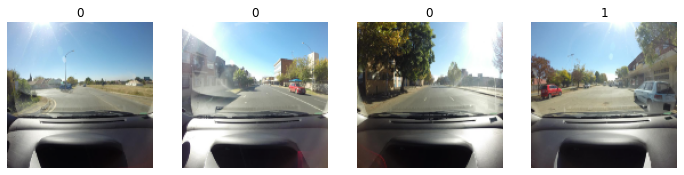

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

#Data Augumentation

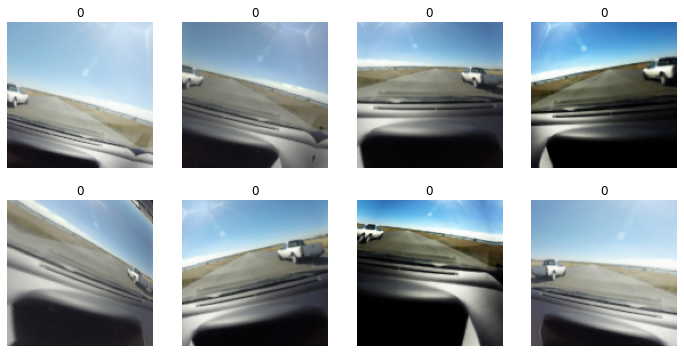

In [7]:
dblock = dblock.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dblock.dataloaders(df)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Training Model

In [9]:
dblock = dblock.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dblock.dataloaders(df)

In [10]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.821910,0.943497,0.368944,11:09


epoch,train_loss,valid_loss,error_rate,time
0,0.498420,0.479721,0.203727,15:08
1,0.375338,0.769561,0.243478,15:11
2,0.259519,0.661432,0.234783,15:05
3,0.207463,0.648135,0.232298,15:12


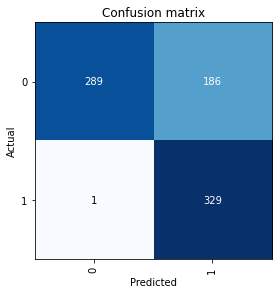

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

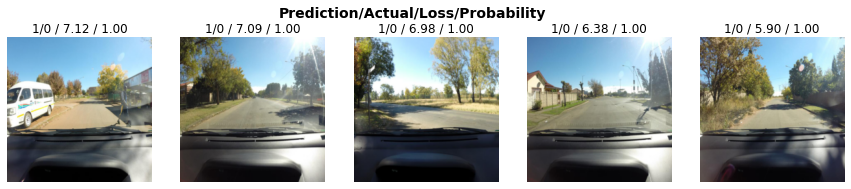

In [12]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: ignored